**РЫНОК ЗАВЕДЕНИЙ ОБЩЕСТВЕННОГО ПИТАНИЯ МОСКВЫ**

**Описание проекта**

Вы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами вы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможете ли вы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?
Вы — гуру аналитики, и партнёры просят вас подготовить исследование рынка. У вас есть открытые данные о заведениях общественного питания в Москве.

[Шаг 1. Загрузка данных и поготовка их к анализу](#step_1)


[Шаг 2. Анализ данных](#step_2)

[Шаг 2.1. Исследуйте соотношение видов объектов общественного питания по количеству.](#step_2_1)

[Шаг 2.2.Исследуйте соотношение сетевых и несетевых заведений по количеству.](#step_2_2)

[Шаг 2.3.Для какого вида объекта общественного питания характерно сетевое распространение?](#step_2_3)

[Шаг 2.4.Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?](#step_2_4)

[Шаг 2.5.Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест?](#step_2_5)

[Шаг 2.6.Выделите в отдельный столбец информацию об улице из столбца address.](#step_2_6)

[Шаг 2.7.Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?](#step_2_7)

[Шаг 2.8.Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?](#step_2_8)

[Шаг 2.9.Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?](#step_2_9)


[Шаг 3 Выводы](#step_3)

<a id='step_1'></a>
**Шаг №1. Загрузим данные и подготовим их к анализу**

In [1]:
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 150  

In [3]:
data = pd.read_csv('/datasets/rest_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [4]:
data.head(5)

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [5]:
#проверим уникальность id 
data['id'].duplicated().sum()

0

In [6]:
# проверим значения для chain и переведем в категориальный тип данных
data['chain'].value_counts()

нет    12398
да      2968
Name: chain, dtype: int64

In [7]:
data['chain'] = data['chain'].astype('category')

In [8]:
# проверим значения для object_type и переведем в катагориальный тип данных
data.groupby('object_type')['number'].agg(['median', 'count'])

,median,count
object_type,,
бар,35,856
буфет,32,585
закусочная,0,360
кафе,30,6099
кафетерий,6,398
магазин (отдел кулинарии),0,273
предприятие быстрого обслуживания,5,1923
ресторан,80,2285
столовая,103,2587


In [9]:
data['object_type'] = data['object_type'].astype('category')

In [10]:
# приведем в порядок занчения для object_name
# приведем все значения в нижний регистр

data['object_name'] = data['object_name'].str.lower()

In [11]:
data.query('chain == "да"')['object_name'].unique()

array(['пиццетория', 'брусника', 'алло пицца', 'суши wok', 'тануки',
       "домино'с пицца", 'готика', 'му-му', 'хлеб насущный', 'tajj mahal',
       'данкин донатс', 'вареничная №1', 'шоколадница', 'теремок',
       'хинкальная', 'шантимель', 'хинкальная city', 'кружка', 'суши вок',
       'примавера', 'виктория', 'пиццерия «академия»', 'чебуречная ссср',
       'макдоналдс', 'grand cru', 'чайхона №1', 'панчо пицца', 'kfc',
       'сабвей', 'ресторан «якитория»', 'советские времена',
       'кафе «андерсон»', 'кафе «subway»', 'ресторан «макдоналдс»',
       'суши сет', 'шоколад', 'тирольские пироги', 'гамбринус',
       'пицца фабрика', 'subway', 'кафе «якитория»', 'кафе «тануки»',
       'сити пицца', 'кофе хаус',
       'кулинарная лавка братьев караваевых братья караваевы', 'прайм',
       'пицца экспресс', 'шоколадница кофе хаус', 'николай', 'якитория',
       'магнолия', 'кофе с собой', 'джаганнат', 'волконский', 'moskalyan',
       'гино-но-таки', 'тратория semplice', 'ньокки',

In [12]:
# посмотрим на данные для ресторана иль патио как примера
to_be_find = "патио"      
mask = data.object_name.str.split(' ').apply(lambda x: to_be_find in x)
data[mask].sample(10)

,id,object_name,chain,object_type,address,number
7682,84467,иль патио планета суши,да,ресторан,"город Москва, Каширское шоссе, дом 14",160
10205,170091,иль патио,да,ресторан,"город Москва, Перовская улица, дом 61А",133
3475,140275,иль патио,да,ресторан,"город Москва, Ленинградский проспект, дом 47, строение 2",53
1473,26019,иль патио планета суши,да,ресторан,"город Москва, проспект Мира, дом 33, корпус 1",65
3582,75587,иль патио планета суши,да,кафе,"город Москва, Камергерский переулок, дом 3А, строение 2",90
8666,111643,ресторан планета суши иль патио,нет,ресторан,"город Москва, Мичуринский проспект, дом 27",100
8469,93810,иль патио,да,ресторан,"город Москва, Пресненская набережная, дом 2",350
9642,167963,иль патио,да,ресторан,"город Москва, Новоясеневский проспект, дом 7",45
3814,27089,иль патио,да,ресторан,"город Москва, Комсомольский проспект, дом 28",400
6362,75459,иль патио,да,кафе,"город Москва, улица Волхонка, дом 15-17, строение 1",123


In [13]:
# один и тот же ресторан может иметь разное название в написании, разный тип объекта и признак принадлежности к сети
# создаим словарь для наиболее известных сетевых ресторанов и добавим скорректированное имя
# так как нам не принципиально название, а важен тип ресторана и признак сети, 
# заменим и такие названия как "иль патио планета суши" на одно из вхождений

data['object_name_new'] = data['object_name']
data['object_type_new'] = data['object_type']
data['chain_new'] = data['chain']

rest_name = {
    'бургер кинг': ['burger king', 'бургер кинг'], 
    'kfc' : ['kfc'], 
    'starbucks' : ['starbucks'],
    'макдоналдс' : ['макдоналдс'], 
    'costa coffee' : ['costa coffee'], 
    'милти' : ['милти'], 
    'тануки' : ['тануки'], 
    'fridays' : ['fridays', "friday's"],
    'кулинарная лавка братьев караваевых' : ['кулинарная лавка братьев караваевых', 'братья караваевы', 'братья караваевых'],    
    'tutti frutti' : ['tutti frutti'], 
    'крошка картошка' : ['крошка картошка'], 
    'dunkin donuts' : ['dunkin donuts', 'данкин донатс'], 
    'суши вок' : ['суши вок'], 
    "домино'с пицца" : ["домино'с пицца"], 
    'му-му': ['му-му'], 
    'андерсон' : ["андресон"], 
    'prime star' : ['прайм стар', 'прайм-стар', 'праймстар', 'prime star'], 
    'starbucks' : ['starbucks'], 
    'гудман' : ['гудман', 'goodman'], 
    'чайхона №1' : ['чайхона №1'], 
    'ваби-саби' : ['ваби-саби', 'ваби саби'], 
    'золотая вобла' : ['золотая вобла'],
    'иль патио' : ['иль патио'], 
    'пицца хат' : ['пицца хат'], 'стардогс' : ['стардогс']
}

In [14]:
for key, value in rest_name.items():
    for set in value:
        mask = data.object_name.apply(lambda x: x.find(set)) >= 0
        if len(data[mask] != 0): 
            data.loc[data[mask].index, 'object_name_new'] = key
#    data.loc[data['object_name_new'] == key, 'object_type_new'] = max(data[data['object_name_new'] == key].object_type.value_counts().to_frame().idxmax())
#    data.loc[data['object_name_new'] == key, 'chain_new'] = 'да'

In [15]:
print('Количество ресторанов после обработки - {}, до обработки - {}'.format(len(data.query('chain == "да"').object_name_new.unique()), len(data.query('chain == "да"').object_name.unique()) ))

Количество ресторанов после обработки - 475, до обработки - 577


In [16]:
# обработаем все сетевые рестораны на принадлежность к одному типу и сети
# добавим наиболее часто встречающийся тип объекта и принадлежность к цепи

chain_rest = data.query('chain == "да"')['object_name_new'].unique()

for name in chain_rest: 
    data.loc[data['object_name_new'] == name, 'object_type_new'] = max(data[data['object_name_new'] == name].object_type.value_counts().to_frame().idxmax())
    data.loc[data['object_name_new'] == name, 'chain_new'] = 'да'
    

In [17]:
# проверим себя
data.query('object_name_new == "fridays"')

,id,object_name,chain,object_type,address,number,object_name_new,object_type_new,chain_new
9381,167564,tgi fridays,да,ресторан,"город Москва, Комсомольская площадь, дом 3",30,fridays,ресторан,да
11516,187631,fridays,нет,ресторан,"город Москва, Большая Тульская улица, дом 13",20,fridays,ресторан,да
11773,186924,ресторан «tgi fridays»,нет,ресторан,"город Москва, Пресненская набережная, дом 2",60,fridays,ресторан,да
11808,96523,fridays,нет,кафе,"город Москва, Ходынский бульвар, дом 4",20,fridays,ресторан,да
12021,174691,fridays,да,ресторан,"город Москва, Кировоградская улица, дом 13А",70,fridays,ресторан,да
12022,94914,tgi fridays,да,ресторан,"город Москва, Ходынский бульвар, дом 4",48,fridays,ресторан,да
14713,209261,t.g.i. friday's + il патио,нет,ресторан,"город Москва, улица Земляной Вал, дом 33",56,fridays,ресторан,да
15233,211435,fridays kfc,да,предприятие быстрого обслуживания,"город Москва, проспект Мира, дом 211, корпус 2",50,fridays,ресторан,да


In [18]:
# проанализируем данные о кол-ве посадочных мест
data['number'].describe()

count    15366.000000
mean        59.547182
std         74.736833
min          0.000000
25%         12.000000
50%         40.000000
75%         80.000000
max       1700.000000
Name: number, dtype: float64

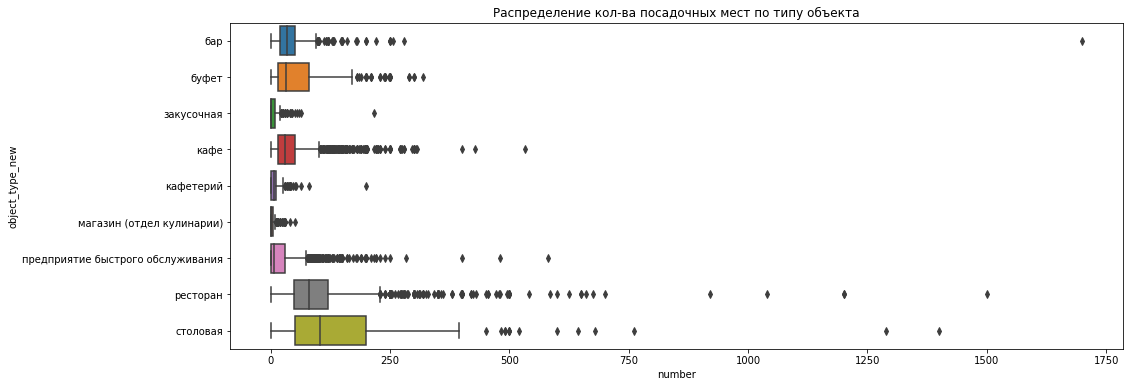

In [19]:
# посмотрим на распределение кол-ва посадочных мест в зависимости от типа объекта
plt.figure(figsize = (16, 6))
plt.title('Распределение кол-ва посадочных мест по типу объекта');
sns.boxplot(y = 'object_type_new', x = 'number', data = data);

In [20]:
#посмотрим на рестораны с нулевым количеством посадочных мест

percent_null = 100 * data.query('number == 0').groupby(by = 'object_type_new')['object_name'].count()/data.groupby(by = 'object_type_new')['object_name'].count()
percent_null.name = 'object with 0 space, %'
percent_null.to_frame().round(2)

,"object with 0 space, %"
object_type_new,
бар,3.35
буфет,10.47
закусочная,55.63
кафе,4.97
кафетерий,28.14
магазин (отдел кулинарии),56.57
предприятие быстрого обслуживания,36.59
ресторан,1.37
столовая,0.74


In [21]:
#посмотрим на расперделение percents
print('Распределение percentile [90, 95, 99] :', np.percentile(data['number'], [90, 95, 99.5])) 
print('Всего {} объектов, с количеством посадочных мест более 350'.format(data.query('number > 350').shape[0]))

Распределение percentile [90, 95, 99] : [150. 214. 350.]
Всего 71 объектов, с количеством посадочных мест более 350


In [22]:
# в данных есть выбросы, в 71 объекте(менее 0.5%) кол-во посадочных мест выше 350. 
# удалим эти объекты из данных как выбросы

data_new = data.query('number <= 350')

In [23]:
# добавим столбец с названием улицы
#data_new.loc[:, 'city'] = data_new['address'].str.split(', ').apply(lambda x: x[0] if 'город' in x[0] and 'город' not in x[1] else '')
#data_new.loc[:, 'street'] = data_new['address'].str.split(', ').apply(lambda x: x[1] if 'город' in x[0] else x[0])

#data_new['city'].value_counts()


In [24]:
# посмотрим на наличие дубликатов
# уникальность объекта определяет название и адрес
mask = data_new.loc[:, ['object_name', 'address']].duplicated()
print("Всего {} объектов с одинаковым адресом и названием".format(len(data_new[mask])))

Всего 225 объектов с одинаковым адресом и названием


In [25]:
# удалим повторения
data_new = data_new.drop(data_new[mask].index)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 9 columns):
id                 15366 non-null int64
object_name        15366 non-null object
chain              15366 non-null category
object_type        15366 non-null category
address            15366 non-null object
number             15366 non-null int64
object_name_new    15366 non-null object
object_type_new    15366 non-null category
chain_new          15366 non-null category
dtypes: category(4), int64(2), object(3)
memory usage: 661.3+ KB


**ВЫВОД:**

* всего 15366 объектов, пропусков нет
* для сетевых объектов характерно различие в написании названия, принадлежности к сети и типа объекта (к примеру, kfc может называться как ресторан kfc, так и предприятие быстрого обслуживания kfc, бать как кафе, так и рестораном для типа объекта).  для наиболее популярных сетевых объектов провели замену называния на короткое, а для каждого сетевого - тип объекта (на чаще встречающийся) и принадлежность сети (да). 
* для количества посадочных мест характерны выбросы: 25% лежит в отрезке 80 - 1700, а всего лишь 0,5% или 71 объект в отрезке более 350. Нулевые значения также присутсвуют, но они более характеры для объектов типа магазин (отдел кулинарии), закусочная, предприятие быстрого обсуживания и кафетерий, что логично. Объекты типа бар, кафе, ресторан и столовая тоже имеют нулевые значения, но менее 5%. Нулевые значения оставили без изменений, так как небольшой % данных, а 0.5% со значением более 350 убрали как выбросы из данных для анализа.
* типы объектов не имеют дублирований (кафе и кафетирий - разные объекты, судя по кол-во нулевых посадочных мест). тип объекта и принадлежности к сети привели к категориальному типу данных. 
* при условии, что уникальность объекта определяет его название (изначальный) и адрес (полный), обнаружилось 225 дублирований, которые удилили из даных для анализа. можно предположить, что данные получались путем связки нескольких таблиц, в результате чего было получились дубликаты с разными id.


<a id='step_2'></a>
**Шаг №2. Анализ данных**

<a id='step_2_1'></a>
**Шаг 2.1. Исследуем соотношение видов объектов общественного питания по количеству. Построим график.**

In [27]:
types = data_new['object_type_new'].value_counts().to_frame().sort_values(by = 'object_type_new', ascending = True)
types

,object_type_new
магазин (отдел кулинарии),197
закусочная,295
кафетерий,361
буфет,555
бар,827
предприятие быстрого обслуживания,2113
ресторан,2142
столовая,2546
кафе,6034


In [28]:
types_percent = 100 * types / types.sum()
types_percent

,object_type_new
магазин (отдел кулинарии),1.307233
закусочная,1.957532
кафетерий,2.395488
буфет,3.682814
бар,5.487724
предприятие быстрого обслуживания,14.021234
ресторан,14.213670
столовая,16.894492
кафе,40.039814


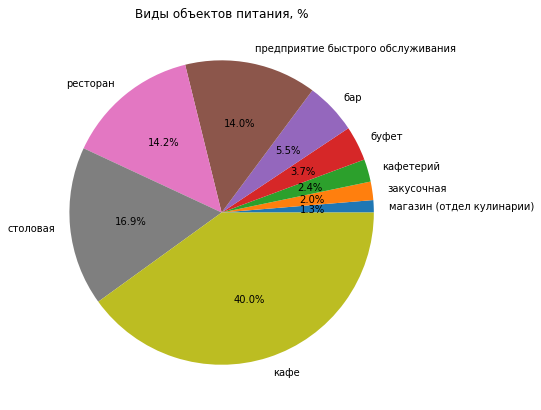

In [29]:
types.plot(kind = 'pie', y = 'object_type_new', autopct='%1.1f%%', legend = False, label = '', figsize = (7, 7))
plt.title("Виды объектов питания, %");

<Figure size 432x288 with 0 Axes>

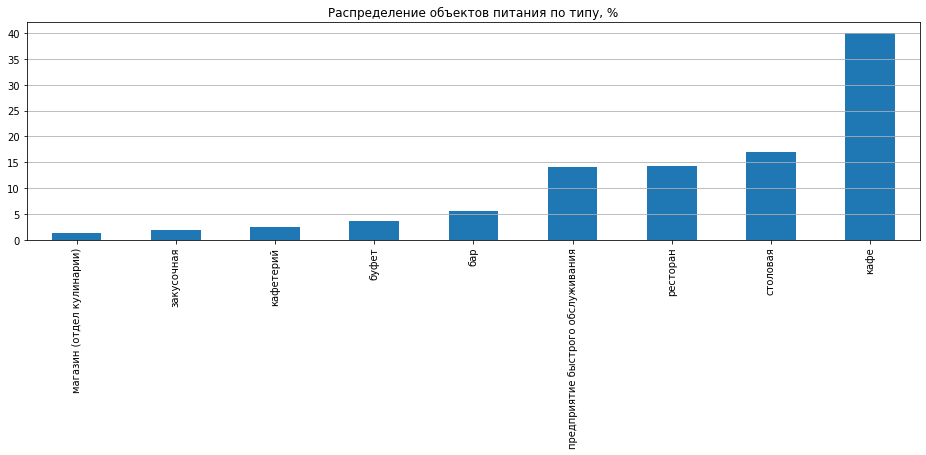

In [30]:
fig = plt.figure()
ax = types_percent.plot(kind = 'bar', y = 'object_type_new', legend = False, label = '', figsize = (16, 4))
ax.grid(axis='y')
plt.title("Распределение объектов питания по типу, %")
plt.show()

40% объектов - кафе, следующие по присутствию типы объектов: столовая (16,9%), ресторан (14,2%) и предприятие быстрого обслуживания (14%). Баров совсем немного - всего лишь 5,5%, а последние места занимают объекты типа буфет (3,7%), кафетерий (2,4%), закусочная (2%) и отдел кулинарии в магазине (1,3%).

<a id='step_2_2'></a>
**Шаг 2.2. Исследуем соотношение сетевых и несетевых заведений по количеству. Построим график.**

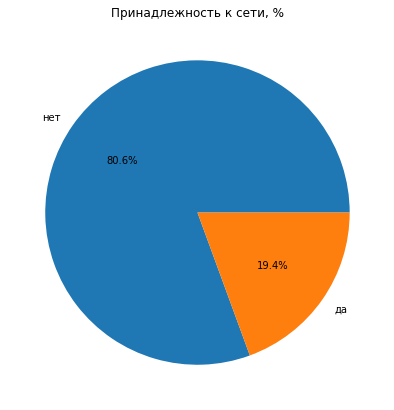

In [31]:
(100* data_new['chain'].value_counts()/data_new.shape[0]).plot(kind = 'pie', autopct='%1.1f%%', legend = False, label = '', figsize = (7, 7))
plt.title("Принадлежность к сети, %");

19,4% объектов являются сетевыми, а большиство - самостоятельные объекты.

<a id='step_2_3'></a>
**Шаг 2.3. Для какого вида объекта общественного питания характерно сетевое распространение?**

In [32]:
data_grouped_chain = data_new.groupby(['object_type_new', 'chain'])['number'].count().reset_index().rename(columns = {'number' : 'count'})

In [33]:
#rest_chain_count = data.pivot_table(index = 'object_type_new', columns = 'chain', values = 'number', aggfunc = 'count')
#rest_count = data.groupby('object_type_new')['number'].count()


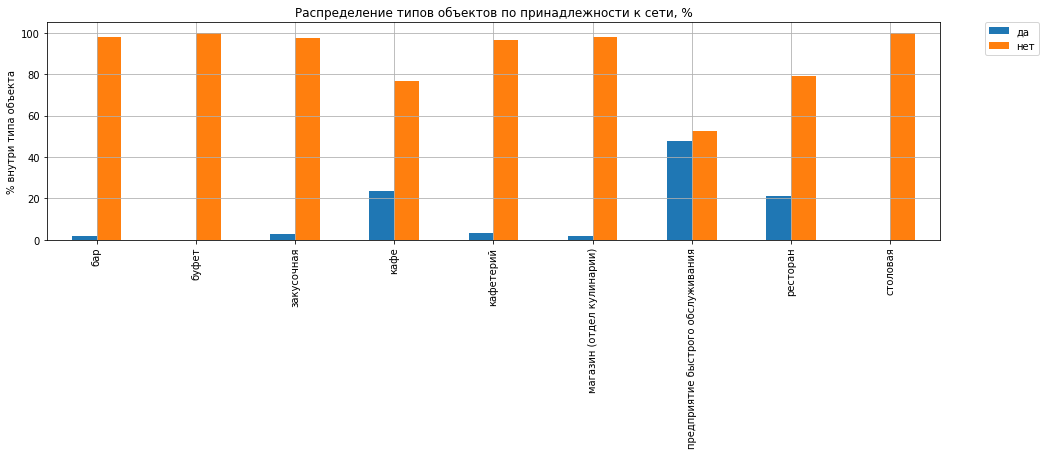

In [34]:
data_chain = 100 * data.pivot_table(index = 'object_type_new', columns = 'chain', values = 'number', aggfunc = 'count').div(data.groupby('object_type_new')['number'].count(), axis=0) 
data_chain.plot(kind = 'bar', figsize = (16, 4), grid = True)
plt.title('Распределение типов объектов по принадлежности к сети, %')
plt.xlabel('')
plt.ylabel('% внутри типа объекта')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);


In [35]:
#sns.set_palette("Set2") 
#sns.catplot(data=data_grouped_chain, kind="bar", y="object_type_new", x="count", hue="chain", aspect = 2.5)

Практически половина всех объектов типа "предприятие быстрого обслуживания" принадлежат сети, более 20% - "кафе" и "ресторан" для каждого. Небольшой % сетевый объектов есть среди баров, закусочных, кафетерий и отделов кулинарии в магазинах. Для буфетов и столовых сетевое распространение отсутствует вовсе. 

<a id='step_2_4'></a>
**Шаг 2.4. Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?**

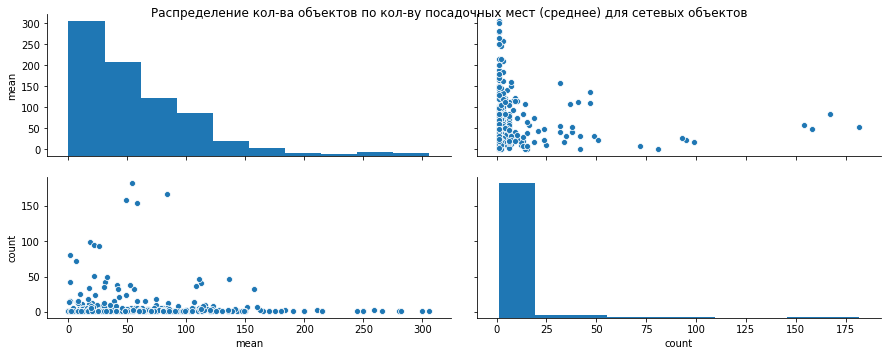

In [36]:
rest_chain_mean = data_new.query('chain == "да"').groupby('object_name_new')['number'].agg(['mean', 'count']) #.sort_values(by = 'count', ascending = False)
sns.pairplot(rest_chain_mean, aspect = 2.5)
plt.suptitle('Распределение кол-ва объектов по кол-ву посадочных мест (среднее) для сетевых объектов');

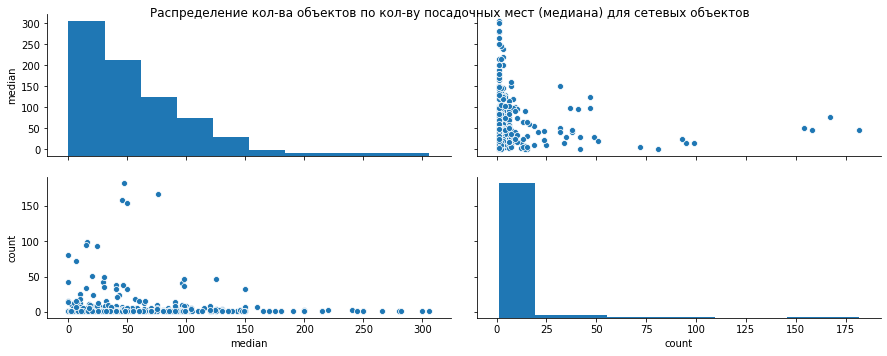

In [37]:
rest_chain_median = data_new.query('chain == "да"').groupby('object_name_new')['number'].agg(['median', 'count']) #.sort_values(by = 'count', ascending = False)
sns.pairplot(rest_chain_median, aspect = 2.5)
plt.suptitle('Распределение кол-ва объектов по кол-ву посадочных мест (медиана) для сетевых объектов');

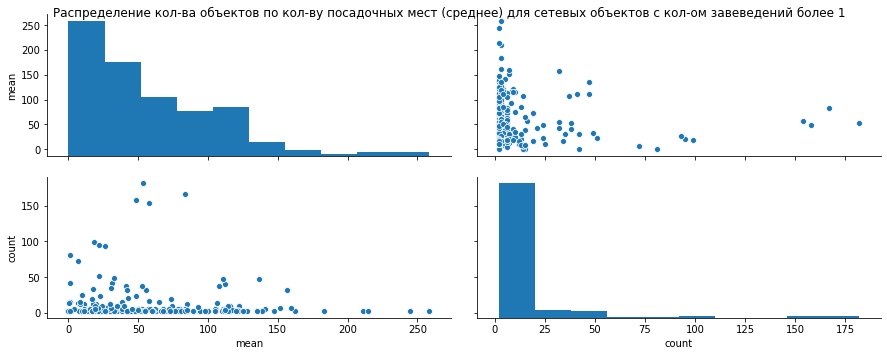

In [85]:
rest_chain_mean_2 = data_new.query('chain == "да"').groupby('object_name_new')['number'].agg(['mean', 'count']).query('count > 1') #.sort_values(by = 'count', ascending = False)
sns.pairplot(rest_chain_mean_2, aspect = 2.5)
plt.suptitle('Распределение кол-ва объектов по кол-ву посадочных мест (среднее) для сетевых объектов с кол-ом завеведений более 1');

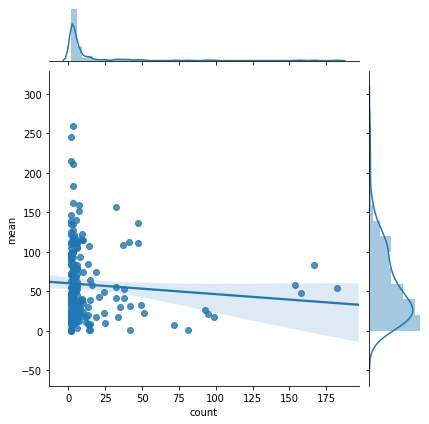

In [92]:
sns.jointplot(data = rest_chain_mean[rest_chain_mean['count'] > 1], y = 'mean', x ='count', kind = 'reg');
#plt.title('Распределение кол-ва объектов по кол-ву посадочных мест (среднее) для сетевых объектов с кол-ом завеведений более 18');

Для сетевых объектов характерно небольшое количество объектов с небольшим числом посадочных мест в каждом.

<a id='step_2_5'></a>
**Шаг 2.5 Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.**

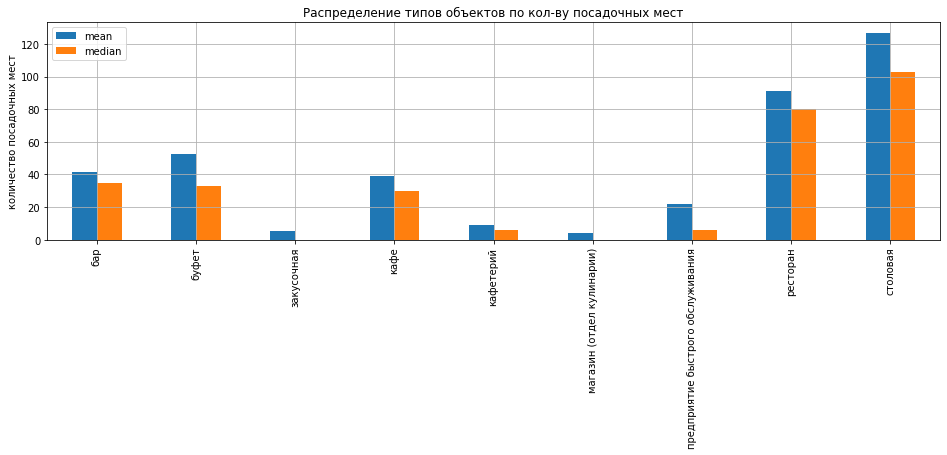

In [40]:
data_new.groupby('object_type_new').number.agg(['mean', 'median']).plot(kind = 'bar', figsize = (16, 4), grid = True)
plt.title('Распределение типов объектов по кол-ву посадочных мест')
plt.xlabel('')
plt.ylabel('количество посадочных мест');

In [41]:
data_new.query('object_type_new == "кафе"').number.describe()

count    6034.000000
mean       38.799470
std        35.697319
min         0.000000
25%        15.000000
50%        30.000000
75%        50.000000
max       307.000000
Name: number, dtype: float64

In [42]:
data_new.query('object_type_new == "кафе"').groupby('chain').number.agg(['mean', 'median'])

,mean,median
chain,,
да,43.081232,35
нет,37.471993,30


Самое большое количество посадочных мест характерно для столовых и ресторанов (со средним 126 и 90 соответвенно). Далее идут буфеты со средним в 52 посад. мест, бары и кафе имеют примерно одинаковое кол-во посадочных мест (со средним 41 и 38 соответсвенно. Для предприятий быстрого обсуживания характерно небольшое кол-во посадочных мест - в 22, а отделы кулинарии в мазазине и закусочные преимущественно работают без столиков. 

Выводы вполне логичные. Столовые и буфеты характеры для общественных организаций и офисов, столовые работают на максимальных охват с часы обеда, поэтому у них максимальный показатель, буфеты работают больше не перекус в течение всего дня. Показатель у ресторанов меньше чем у столовых, но тоже высокий, по той же причине: для максимального охвата в часы обеда и ужина. Для кафе и баров характерно меньшее кол-во посадочных мест: они меньше рестронов, но больше предприятий быстрого обсуживания, у которых высокая пропускная способность. Закусочные и отделы кулинарии в целом работают больше на вынос. 

<a id='step_2_6'></a>
**Шаг 2.6. Выделите в отдельный столбец информацию об улице из столбца address.**

In [43]:
# проанализируем улицы
data.address.str.split(', ').apply(lambda x: x[1]).value_counts().head(10)

город Зеленоград          232
проспект Мира             204
Профсоюзная улица         182
Ленинградский проспект    171
Пресненская набережная    167
Варшавское шоссе          161
Ленинский проспект        147
поселение Сосенское       138
проспект Вернадского      132
Кутузовский проспект      114
Name: address, dtype: int64

In [44]:
# в городе Москве есть как улицы, так и отдельные города внутри: город Зеленоград и поселение Сосенское.
# посмотрим на данные
city_to_find = 'Зеленоград,'      
mask = data_new.address.str.split(' ').apply(lambda x: city_to_find in x)
zelenograd = data_new[mask].index.to_list()
print('Всего {} обектов питания в городе Зеленограде'.format(len(zelenograd)))
data_new[mask].sample(5)

Всего 229 обектов питания в городе Зеленограде


,id,object_name,chain,object_type,address,number,object_name_new,object_type_new,chain_new
7239,22320,якитория,да,ресторан,"город Москва, город Зеленоград, корпус 1550",108,якитория,ресторан,да
7221,23379,ниимэ и завод микрон,нет,столовая,"город Москва, город Зеленоград, 1-й Западный проезд, дом 12, строение 1",230,ниимэ и завод микрон,столовая,нет
9213,162794,бар «dubai»,нет,бар,"город Москва, город Зеленоград, Новокрюковская улица, дом 7",50,бар «dubai»,бар,нет
2519,25792,бар «все свои»,нет,бар,"город Москва, город Зеленоград, корпус 1604",23,бар «все свои»,бар,нет
9661,168553,гастрономическая бургерная янхук,нет,кафе,"город Москва, город Зеленоград, корпус 426А, строение 2",30,гастрономическая бургерная янхук,кафе,нет


In [45]:
city_to_find = 'Сосенское,'      
mask = data_new.address.str.split(' ').apply(lambda x: city_to_find in x)
sosenskoe = data_new[mask].index.to_list()
print('Всего {} обектов питания в поселке Сосенское'.format(len(sosenskoe)))
data_new[mask].sample(5)

Всего 137 обектов питания в поселке Сосенское


,id,object_name,chain,object_type,address,number,object_name_new,object_type_new,chain_new
9609,164452,чё хотэли пили ели,нет,ресторан,"город Москва, поселение Сосенское, ж/к ""Дубровка"", Сосновая улица, дом 15",128,чё хотэли пили ели,ресторан,нет
13367,199101,суши сет,да,кафе,"город Москва, поселение Сосенское, посёлок Коммунарка, улица Александры Монаховой, дом 92, корпус 1",16,суши сет,кафе,да
13407,196577,florentini,да,ресторан,"город Москва, поселение Сосенское, ж/к ""Дубровка"", Сосновая улица, дом 15",80,florentini,ресторан,да
13268,202506,алиса,нет,кафе,"город Москва, поселение Сосенское, посёлок Коммунарка, улица Александры Монаховой, дом 96, корпус 2",15,алиса,кафе,нет
12506,201925,familly film,нет,кафе,"город Москва, поселение Сосенское, посёлок Коммунарка, улица Потаповская Роща, дом 4, корпус 2",15,familly film,кафе,нет


In [46]:
#from pymystem3 import Mystem
#m = Mystem()
#from collections import Counter

#лематизируем и посчитаем чаще встречающиеся значения
#lemas = m.lemmatize(str(data_new.address.to_list()))
#print(Counter(lemas))

In [47]:
# выделим улицу
patern = '(([а-яА-я0-9№N\-ёй\s"]+)?(улица|переулок|шоссе|проспект|проезд|Проезд|бульвар|набережная|площадь|квартал|аллея|тупик|территория|микрорайон|деревня|посёлок|линия|просек)([а-яА-я0-9№N\-ёй\s"]+)?)\,'
data_new['street'] = data.address.str.extract(pat = patern)[0]

In [48]:
#уберем пробелы на концах строк для поции 
data_new.street = data_new.street.str.strip()

In [49]:
#посмотрим на адреса без улицы
mask = data_new.street.isna()
print("Всего {} или {:.2f}% объектов без улицы".format(data_new[mask].shape[0], data_new[mask].shape[0]/ data_new.shape[0]))
#data_new[mask].address.unique()

Всего 176 или 0.01% объектов без улицы


Выделили улицу из адреса, осталось 176 объект без улицы, всего 0,01%, которые находятся в городе Зеленограде, поселениях и прочих округах Москвы. Не будем им учитывать при анализе.

<a id='step_2_7'></a>
**Шаг 2.7. Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?**

p.s. на мой взлгяд неверно поставлен вопрос. так как сначала мы выделяем улицы, то в топ-10 попадают проспекты и шоссе. и в результате получаем непонятные администратичные единицы/районы, из которых выводы получаются не логичные. я бы сначала определила для адреса район, а потом уже делатла группировку по району (сама не стала этого делать, как так в данных около 9000 уникальных адресов, а апи яндекса поддерживает 1000 в сутки). Итого у меня два варианта: первый - я для улиц подгрузила районы, второй - для топ-10 улиц я по яндекс АПИ получаю район (и тот тут загвоздки, так как для координат может быть несколько districts, поэтому я делала запрос на один результат и все значения сохраняла строкой). Для второго варианта я сохранила файл и подгрузила его через google.sheets. 

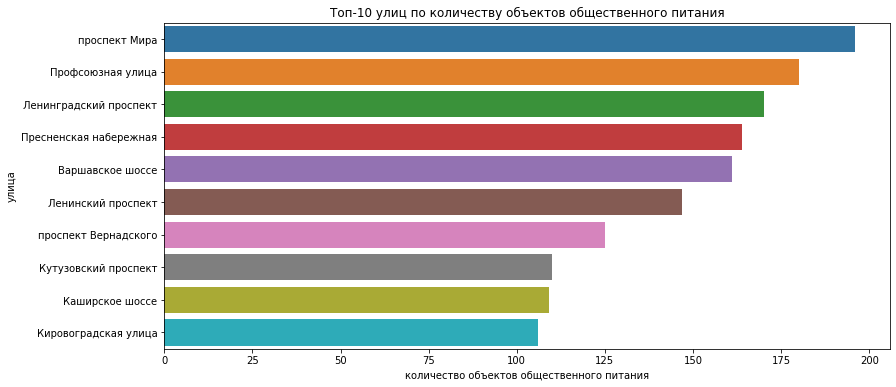

In [50]:
data_streets = data_new.groupby('street').id.count().sort_values(ascending = False).head(10)
data_streets.to_frame().reset_index()

plt.figure(figsize = (13, 6))
sns.barplot(x='id', y='street', data=data_streets.to_frame().reset_index())
plt.title('Топ-10 улиц по количеству объектов общественного питания')
plt.xlabel('количество объектов общественного питания')
plt.ylabel('улица');

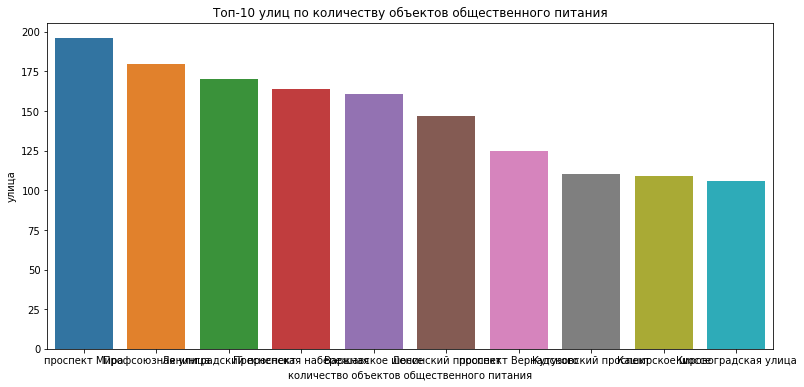

In [51]:
data_streets = data_new.groupby('street').id.count().sort_values(ascending = False).head(10)
data_streets.to_frame().reset_index()

plt.figure(figsize = (13, 6))
sns.barplot(y='id', x='street', data=data_streets.to_frame().reset_index())
plt.title('Топ-10 улиц по количеству объектов общественного питания')
plt.xlabel('количество объектов общественного питания')
plt.ylabel('улица');

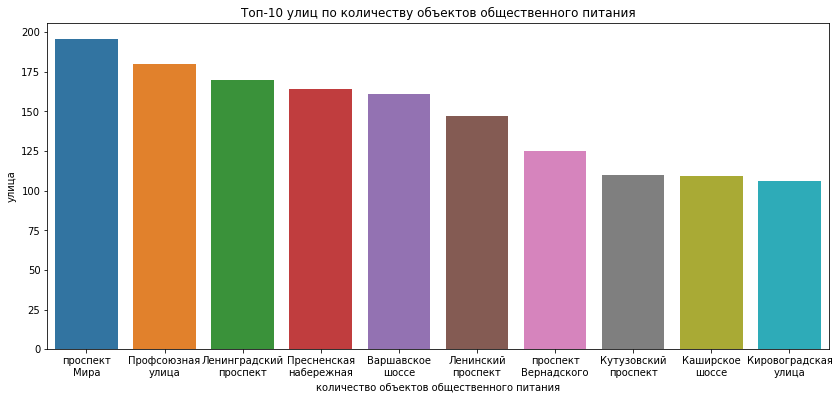

In [52]:
# Код ревьюера
data_streets.index = [i.replace(' ', '\n') for i in data_streets.index]

data_streets = data_streets.to_frame().reset_index()
data_streets.columns = ['street', 'value']

plt.figure(figsize = (14, 6))
sns.barplot(y='value', x='street', data=data_streets)
plt.title('Топ-10 улиц по количеству объектов общественного питания')
plt.xlabel('количество объектов общественного питания')
plt.ylabel('улица');

In [53]:
#посмотрим то-10 улиц с наибольшим количеством объектов питания
data_streets = data_new.groupby('street').id.count().sort_values(ascending = False).head(10)
streets = data_streets.index.to_list()
streets

['проспект Мира',
 'Профсоюзная улица',
 'Ленинградский проспект',
 'Пресненская набережная',
 'Варшавское шоссе',
 'Ленинский проспект',
 'проспект Вернадского',
 'Кутузовский проспект',
 'Каширское шоссе',
 'Кировоградская улица']

In [54]:
from io import BytesIO
import requests
spreadsheet_id = '19_K4-JuQUnW1k2PfMZi1V_m1rTTaqUtaT8t994uuZRw'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
df = pd.read_csv(BytesIO(r.content))
df.head()

,street,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район


In [55]:
df.query('street in @streets')['area'].unique()

array(['Пресненский район', 'Район Дорогомилово', 'Район Фили-Давыдково',
       'Район Проспект Вернадского', 'Район Раменки',
       'Район Тропарево-Никулино', 'Район Аэропорт', 'Район Беговой',
       'Хорошевский район', 'Район Сокол', 'Алексеевский район',
       'Ярославский Район', 'Район Марьина роща', 'Останкинский район',
       'Район Ростокино', 'Район Свиблово', 'Район Чертаново Центральное',
       'Район Чертаново Северное', 'Район Чертаново Южное',
       'Донской район', 'Район Москворечье-Сабурово',
       'Район Нагатино-Садовники', 'Нагорный район',
       'Район Орехово-Борисово Южное', 'Район Орехово-Борисово Северное',
       'Академический район', 'Район Черемушки', 'Район Гагаринский',
       'Район Ясенево', 'Район Коньково', 'Ломоносовский район',
       'Обручевский район', 'Район Северное Бутово', 'Район Теплый Стан',
       'Район Южное Бутово', 'Район Якиманка', 'Мещанский район'],
      dtype=object)

**ВЫВОД:** 
* больше всего объектов общественного питания находятся на улицах проспект Мира, Профсоюзная улица, Ленинградский проспект, Пресненская набережная, Варшавское шоссе, Ленинский проспект, проспект Вернадского, Кутузовский проспект, Каширское шоссе, Кировоградская улица. 


* эти улицы находятся в районах: 'Пресненский район', 'Район Аэропорт', 'Район Беговой', 'Хорошевский район', 'Район Сокол', 'Алексеевский район', 'Ярославский Район', 'Район Марьина роща', 'Останкинский район', 'Район Ростокино', 'Район Свиблово',  'Район Чертаново Центральное', 'Район Чертаново Северное', 'Район Чертаново Южное', 'Донской район', 'Район Нагатино-Садовники', 'Нагорный район', 'Академический район', 'Район Черемушки', 'Район Ясенево', 'Район Коньково', 'Обручевский район', 'Район Северное Бутово', 'Район Теплый Стан', 'Район Южное Бутово', 'Мещанский район'.

In [56]:
"""
#выберем объекты, которые находятся на топ-10 улицах 
#выделим уникальные улицы и для каждой найдем район

data_address = data_new.query('street in @streets')['address'].value_counts().reset_index()
data_address = data_address.rename(columns = {'index' : 'address', 'address' : 'count'})

data_address['address+'] = data_address.address.apply(lambda x: x.replace(', ', ',+')) 

print("Всего {} уникальных адресов".format(data_address.shape[0]))
"""

'\n#выберем объекты, которые находятся на топ-10 улицах \n#выделим уникальные улицы и для каждой найдем район\n\ndata_address = data_new.query(\'street in @streets\')[\'address\'].value_counts().reset_index()\ndata_address = data_address.rename(columns = {\'index\' : \'address\', \'address\' : \'count\'})\n\ndata_address[\'address+\'] = data_address.address.apply(lambda x: x.replace(\', \', \',+\')) \n\nprint("Всего {} уникальных адресов".format(data_address.shape[0]))\n'

In [57]:
"""
# обратимся к API yandex для определения района
import requests
import re
URL = 'https://geocode-maps.yandex.ru/1.x'
"""

"\n# обратимся к API yandex для определения района\nimport requests\nimport re\nURL = 'https://geocode-maps.yandex.ru/1.x'\n"

In [58]:
"""
def district(address): 
    
    #делаем запрос на получения координат по адресу
    params = {
    'geocode': address,
    'apikey' : '19ff2d83-628d-405b-ad3e-802795e02693', 
    'format' : 'json'
    }
    response = requests.get(URL, params=params)                      
   
    #ищем координаты в ответе
    patern = '{"pos":"\d+.\d+ \d+.\d+"}'
    coor_string = re.search(patern, response.text).group()

    coordinates = re.findall('\d+.\d+', coor_string)[0] + ', ' + re.findall('\d+.\d+', coor_string)[1]
   
    # делаем запрос на поиск района по координатам
    params_geo = { 
    'geocode' : coordinates,
    'apikey' : '19ff2d83-628d-405b-ad3e-802795e02693', 
    'kind' : 'district',
    'results' : 1,
    'format' : 'json'
    }

    response_geo = requests.get(URL, params=params_geo)             
    
    patern1 = '{"kind":"district","name":"(.+?)\"}'       
    try: coor_string = str(re.findall(patern1, response_geo.text)) #re.findall(patern1, response_geo.text)[1]
    except: coor_string = "error"
   
    return coor_string
    
"""

'\ndef district(address): \n    \n    #делаем запрос на получения координат по адресу\n    params = {\n    \'geocode\': address,\n    \'apikey\' : \'19ff2d83-628d-405b-ad3e-802795e02693\', \n    \'format\' : \'json\'\n    }\n    response = requests.get(URL, params=params)                      \n   \n    #ищем координаты в ответе\n    patern = \'{"pos":"\\d+.\\d+ \\d+.\\d+"}\'\n    coor_string = re.search(patern, response.text).group()\n\n    coordinates = re.findall(\'\\d+.\\d+\', coor_string)[0] + \', \' + re.findall(\'\\d+.\\d+\', coor_string)[1]\n   \n    # делаем запрос на поиск района по координатам\n    params_geo = { \n    \'geocode\' : coordinates,\n    \'apikey\' : \'19ff2d83-628d-405b-ad3e-802795e02693\', \n    \'kind\' : \'district\',\n    \'results\' : 1,\n    \'format\' : \'json\'\n    }\n\n    response_geo = requests.get(URL, params=params_geo)             \n    \n    patern1 = \'{"kind":"district","name":"(.+?)"}\'       \n    try: coor_string = str(re.findall(patern1, r

In [59]:
#data_address['dist_1'] = data_address['address+'].head(500).apply(district)

In [60]:
#data_address['dist'] = data_address['address+'].tail(90).apply(district)

In [61]:
#сохраним результаты
#data_address.to_csv('data_address', sep='\t')

In [62]:
#откроем через google.sheets
#https://docs.google.com/spreadsheets/d/1aEVKuhVMBURb2NoQXpt92RnZeh5fQWy51Jke7AMLcC8/edit?usp=sharing

spreadsheet_id_2 = '1aEVKuhVMBURb2NoQXpt92RnZeh5fQWy51Jke7AMLcC8'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id_2)
r = requests.get(file_name)
data_dist = pd.read_csv(BytesIO(r.content))
data_dist.head()

,address,count,address+,district
0,"город Москва, Пресненская набережная, дом 2",63,"город Москва,+Пресненская набережная,+дом 2","['Центральный административный округ', 'Пресненский район', 'Московский международный деловой центр Москва-Сити']"
1,"город Москва, проспект Мира, дом 211, корпус 2",60,"город Москва,+проспект Мира,+дом 211,+корпус 2","['Северо-Восточный административный округ', 'район Свиблово']"
2,"город Москва, Кировоградская улица, дом 13А",53,"город Москва,+Кировоградская улица,+дом 13А","['Южный административный округ', 'район Чертаново Центральное']"
3,"город Москва, Кутузовский проспект, дом 57",40,"город Москва,+Кутузовский проспект,+дом 57","['Западный административный округ', 'район Фили-Давыдково']"
4,"город Москва, проспект Вернадского, дом 6",30,"город Москва,+проспект Вернадского,+дом 6","['Западный административный округ', 'район Раменки']"


In [63]:
#выведим топ-10 районов, где находятся пот-10 улиц
data_dist.groupby('district')['count'].sum().sort_values(ascending = False).to_frame().reset_index().head(10)

,district,count
0,"['Центральный административный округ', 'Пресненский район', 'Московский международный деловой центр Москва-Сити']",166
1,"['Южный административный округ', 'район Чертаново Центральное']",91
2,"['Западный административный округ', 'район Тропарёво-Никулино']",85
3,"['Центральный административный округ', 'Мещанский район']",63
4,"['Северо-Восточный административный округ', 'район Свиблово']",62
5,"['Северный административный округ', 'район Аэропорт']",62
6,"['Западный административный округ', 'район Дорогомилово']",59
7,"['Южный административный округ', 'район Нагатино-Садовники']",54
8,"['Западный административный округ', 'район Фили-Давыдково']",53
9,"['Северный административный округ', 'район Беговой']",48


In [64]:
data_new.query('street in @streets').groupby('chain')['chain'].count()

chain
да      377
нет    1091
Name: chain, dtype: int64

In [65]:
data_new.query('street in @streets').groupby('object_type_new')['chain'].count().sort_values(ascending = False)

object_type_new
кафе                                 610
предприятие быстрого обслуживания    288
ресторан                             276
столовая                             136
бар                                   59
кафетерий                             41
буфет                                 29
магазин (отдел кулинарии)             18
закусочная                            11
Name: chain, dtype: int64

In [100]:
data_top_streets = data_new.query('street in @streets').groupby(['object_type_new', 'chain'])['chain'].count().unstack(1).fillna(0) #.sort_values(ascending = False)
data_top_streets.sort_values(by = 'нет', ascending = False)

chain,да,нет
object_type_new,,
кафе,175.0,435.0
ресторан,63.0,213.0
предприятие быстрого обслуживания,137.0,151.0
столовая,0.0,136.0
бар,1.0,58.0
кафетерий,1.0,40.0
буфет,0.0,29.0
магазин (отдел кулинарии),0.0,18.0
закусочная,0.0,11.0


**ВЫВОД** 

Больше всего объектов общественного питания находится в районах Москва-Сити, Чертаново Цетральном и Тропарево-Никулино. Москва-Сити - бизнес центр с большим количеством объектов общественного питания, и, вероятно, не цетральные районы выходят в топ-10 за счет наличия торговых цетров, для которых характерно большое кол-во объектов общественного питания, а также кафе возле метро. 

<a id='step_2_8'></a>
**Шаг 2.8. Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?**

In [66]:
data_one_object = data_new.groupby('street').id.count().to_frame().query('id == 1')
print('Всего {} улиц c одним объектом общественного питания'.format(len(data_one_object)))

Всего 582 улиц c одним объектом общественного питания


In [67]:
# выделим улицы в список
streets_one_object = data_one_object.index.to_list()

In [111]:
df.query('street in @streets_one_object')['area'].value_counts().head(10).to_frame().rename(columns = {'area' : 'count'})


,count
Таганский район,27
Район Хамовники,27
Басманный район,26
Тверской район,21
Пресненский район,20
Район Марьина роща,18
Район Арбат,18
Мещанский район,16
Район Сокольники,15
Район Замоскворечье,14


In [70]:
data_new.query('street in @streets_one_object').groupby('object_type_new')['chain'].count().sort_values(ascending = False)

object_type_new
столовая                             229
кафе                                 171
ресторан                              64
буфет                                 59
предприятие быстрого обслуживания     20
бар                                   19
закусочная                             8
магазин (отдел кулинарии)              7
кафетерий                              5
Name: chain, dtype: int64

In [101]:
data_top_streets = data_new.query('street in @streets_one_object').groupby(['object_type_new', 'chain'])['chain'].count().unstack(1).fillna(0) #.sort_values(ascending = False)
data_top_streets.sort_values(by = 'нет', ascending = False)

chain,да,нет
object_type_new,,
столовая,0.0,229.0
кафе,13.0,158.0
буфет,0.0,59.0
ресторан,7.0,57.0
бар,0.0,19.0
предприятие быстрого обслуживания,5.0,15.0
закусочная,0.0,8.0
магазин (отдел кулинарии),0.0,7.0
кафетерий,0.0,5.0


Достаточно много улиц с один объектом общественного питания находится в центре города: в районах Таганский, Хамовники, Басманный, Тверской, Пресненский и другие, и это преимущественно несетевые объекты питания типа столовая и кафе. 

Вероятно, для общественных организаций в центре Москвы характеры столовые в зданиях, а несетевые кафе расположились на узких и коротких улицах с высокой арендной платой в центре Москвы.

<a id='step_2_8'></a>
**Шаг 2.9. Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?**

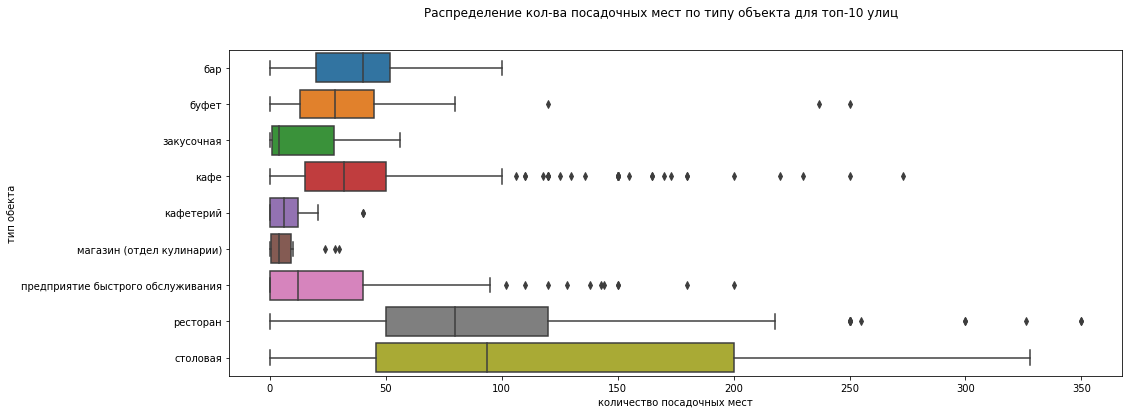

In [71]:
plt.figure(figsize = (16, 6))
plt.suptitle('Распределение кол-ва посадочных мест по типу объекта для топ-10 улиц');
sns.boxplot(y = 'object_type_new', x = 'number', data = data_new.query('street in @streets'))
plt.xlabel('количество посадочных мест')
plt.ylabel('тип обекта');

<a id='step_3'></a>
**ОБЩИЙ ВЫВОД:**

* Наибольшую долю рынка преприятий общественного питания занимают кафе - 40%. По 14%, 14,2% и 16,9% занимают предприятия быстрого обсуживания, рестораны и столовые. 

* Для столовых и ресторанов характерно большое количество посадочных мест по 126 и 90 соответсвенно, в буфетах - 52, чуть меньше в кафе и барах в среднем 41 и 38 соответсвенно. Для предприятий быстрого обсуживания характерно небольшое кол-во посадочных мест - в 22, а отделы кулинарии в мазазине и закусочные преимущественно работают без столиков. 

* 19,8% объектов имеют сетевое распространением, и в большем случае это предприятия быстрого обслуживания, кафе и рестораны. 

* больше всего объектов общественного питания находится в районах Москва-Сити, Чертаново Цетральном и Тропарево-Никулино. Москва-Сити - бизнес центр с большим количеством объектов общественного питания, и, вероятно, не цетральные районы выходят в топ-10 за счет наличия торговых цетров, для которых характерно большое кол-во объектов общественного питания, а также кафе возле метро.

* по одному объекту общественного питания находится на улицах в цетральных районах: преимущественно это несетвые объекты типа столовая и кафе. 

* рекомендуется открывать кафе с небольшим количеством посадочных мест (до 40). 

ссылка на презентацию https://docs.google.com/presentation/d/1Y3s8qMuCIriDiLnNxyPhKkqpOcowifnu6MCiJuxe9m0/edit?usp=sharing
